In [1]:
import nibabel as nib
import pandas as pd
import numpy as np
from neurotools.plotting import plot
from neurotools.loading import load
from neurotools.transform import SurfLabels

/home/sage/anaconda3/envs/bpt/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


The first step is loading some set of rois for an example subject just as a 1D numpy array, in this case w/ length 379.

In [2]:
rois = pd.read_csv('ex_rois.csv', header=None)
rois = np.squeeze(np.array(rois))
rois.shape

(379,)

Next, we need to load the parcellation label file in a simmilar way, i.e., as just a flat 1D array.

In [3]:
parcel = nib.load('HCP2016FreeSurferSubcortical_dparc.dlabel.nii')
parcel_labels = np.array(parcel.get_fdata()).squeeze()
parcel_labels.shape

(96854,)

Then, we initialize a SurfLabels object based off the parcel labels file - which we can use to inverse transform the ROIs back into the space of the dlabel file

In [4]:
sl_transformer = SurfLabels(parcel_labels, background_label=0)
data = sl_transformer.inverse_transform(rois)
data.shape

(96854,)

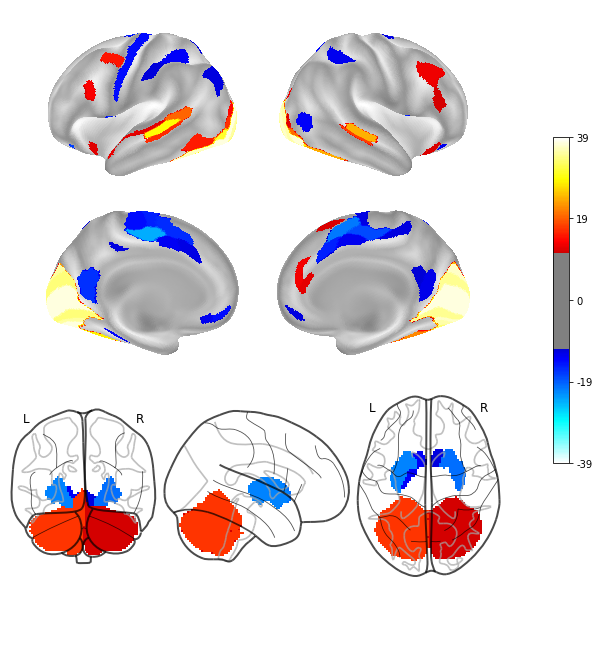

In [5]:
plot(data)

In [ ]:
plot(data, vol_plot_type='stat')

/home/sage/anaconda3/envs/bpt/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:341: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()
